In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import os
import plotly.express as px


In [ ]:
original_df = pd.read_csv('./data/final_data.csv')
len(original_df)

1675

In [ ]:
original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1675 entries, 0 to 1674
Data columns (total 37 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           1675 non-null   int64  
 1   Niche Name           1675 non-null   object 
 2   Niche City           1675 non-null   object 
 3   Maps_ID              1675 non-null   object 
 4   Maps_Name            1675 non-null   object 
 5   Maps Address         1675 non-null   object 
 6   Maps_Rating          1675 non-null   float64
 7   Name                 1675 non-null   object 
 8   Link                 1675 non-null   object 
 9   Graduation Rate      1675 non-null   float64
 10  Reading Proficiency  1675 non-null   float64
 11  Math Proficiency     1675 non-null   float64
 12  AP Pass Rate         1035 non-null   float64
 13  AP Enrollment Rate   991 non-null    float64
 14  APs Offered          957 non-null    float64
 15  SAT                  1284 non-null   f

The only data columns we need are Name, City (either for each), Maps Rating, Graduation Rate, SAT, ACT, Rating from Niche, District, County

In [ ]:
df = original_df[['Niche Name', 'Matched City', 'District', 'County', 'Maps_Rating', 'Graduation Rate', 'Reading Proficiency', 'Math Proficiency', 'SAT', 'ACT', 'AP Pass Rate']]
df.rename(columns={'Niche Name':'Name', 'Matched City':'City', 'Maps_Rating':'Google Review Rating', 'Rating':'Niche Rating'}, inplace=True)
df.head()

/var/folders/83/bb9llccs7mjbf11yjv71ybpm0000gn/T/ipykernel_61031/2237986465.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Niche Name':'Name', 'Matched City':'City', 'Maps_Rating':'Google Review Rating', 'Rating':'Niche Rating'}, inplace=True)


,Name,City,District,County,Google Review Rating,Graduation Rate,Reading Proficiency,Math Proficiency,SAT,ACT,AP Pass Rate
0,California Academy of Mathematics & Science,Carson,Long Beach Unified,Los Angeles,4.3,0.95,0.95,0.92,1340.0,31.0,0.73
1,Girls Academic Leadership Academy: Dr. Michell...,Los Angeles,Los Angeles Unified,Los Angeles,3.8,1.00,0.89,0.57,1260.0,30.0,0.87
2,Troy High School,Fullerton,Fullerton Joint Union High,Orange,4.2,0.99,0.85,0.73,1410.0,32.0,0.92
3,Henry M. Gunn High School,Palo Alto,Palo Alto Unified,Santa Clara,3.9,0.97,0.87,0.82,1430.0,32.0,0.96
4,Canyon Crest Academy,San Diego,San Dieguito Union High,San Diego,4.4,0.99,0.89,0.80,1430.0,32.0,0.88


We want to run regression on a number of pairs, so we will define them below

In [ ]:
pairs = [ # every pair of vairables we want to investigate
    ('Graduation Rate', 'Google Review Rating'),
    ('Reading Proficiency', 'Google Review Rating'),
    ('Math Proficiency', 'Google Review Rating'),
    ('SAT', 'Google Review Rating'),
    ('AP Pass Rate', 'Google Review Rating'),
]

In [ ]:
def plot_scatter(feature, target):
    df_clean = df.dropna(subset=[target, feature]) # ensure we drop NA
    X = df_clean[feature]
    y = df_clean[target]
    # plot
    plt.figure(figsize=(8, 6))
    plt.scatter(X, y, color='blue', label='Data Points')
    plt.title(f"Scatter Plot: {target} vs {feature}")
    plt.xlabel(feature)
    plt.ylabel(target)
    plt.grid(True)
    plt.legend()
    os.makedirs('./plots', exist_ok=True)
    plt.savefig(f"./plots/{feature}_scatter.png")
    plt.show()

In [ ]:
def linear_regression(feature, target):
    df_clean = df.dropna(subset=[target, feature]) # ensure we drop NA
    X = df_clean[[feature]] # double brackets to make sure X is a df
    y = df_clean[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # data splits
    # model training
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    # metrics
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    print(f"Regression results for {target} vs {feature}:")
    print(f"R-squared: {r2}")
    print(f"Mean Squared Error: {mse}")
    # plots
    plt.scatter(X_test, y_test, color='blue', label='Actual data')
    plt.plot(X_test, y_pred, color='red', label='Regression line')
    plt.xlabel(feature)
    plt.ylabel(target)
    plt.title(f"{target} vs {feature}")
    plt.legend()
    plt.savefig(f"./plots/{feature}_regression.png")
    plt.show()
    return r2, mse

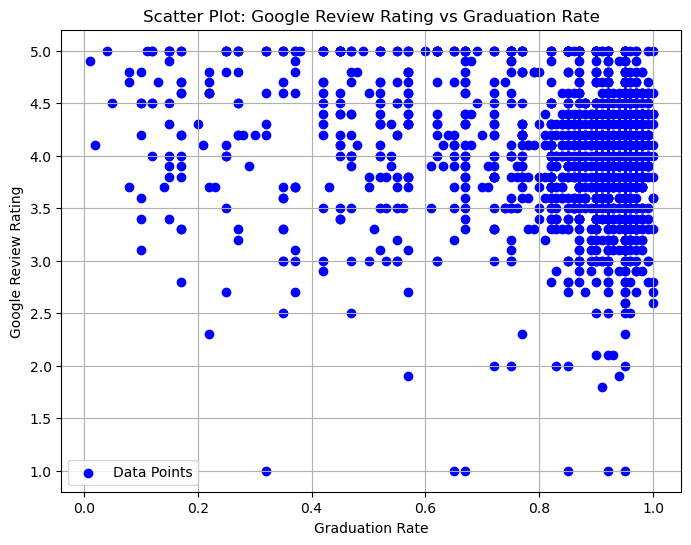

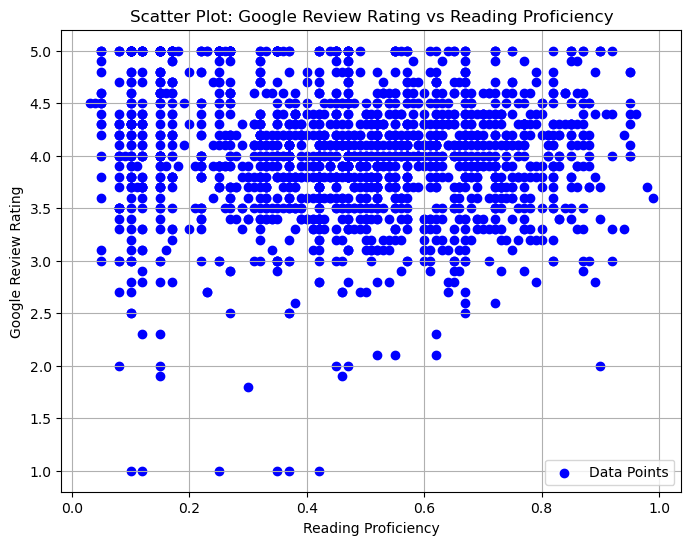

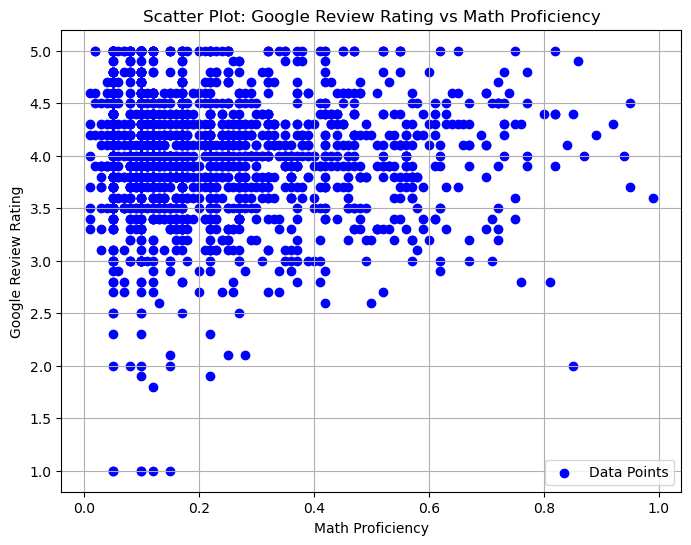

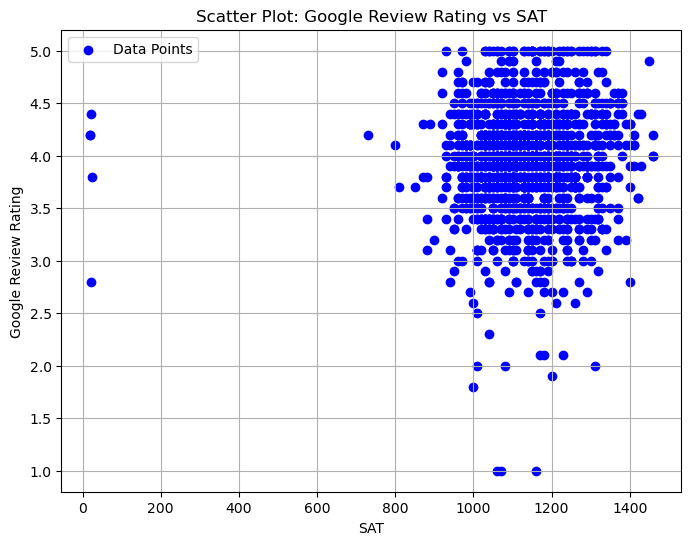

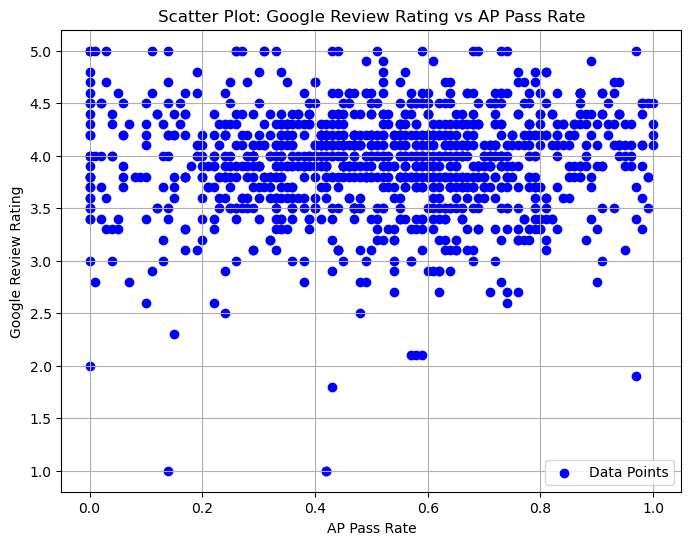

In [ ]:
for pair in pairs:
    plot_scatter(pair[0], pair[1])

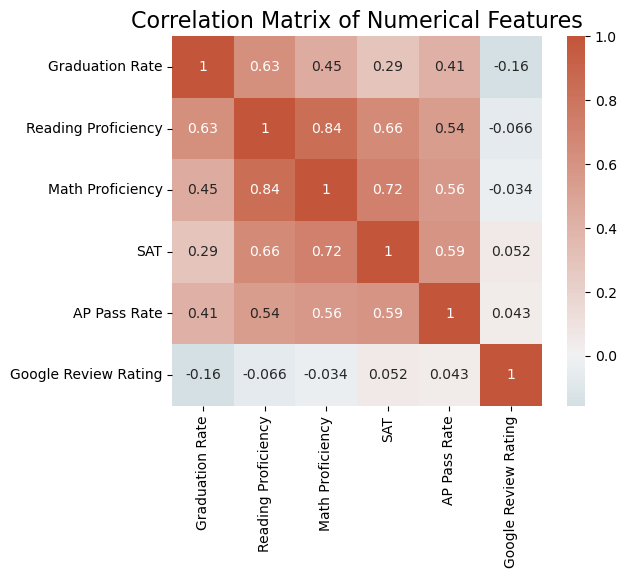

In [ ]:
features = [i[0] for i in pairs]
features.append(pairs[0][1])
corr_matrix = df[features].corr() # all numerical values we want
sns.heatmap(corr_matrix, vmax= 1, square=True, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True), center=0) # needed it to basically go blue to red with 0 being neutral
plt.title("Correlation Matrix of Numerical Features", fontsize=16)
plt.savefig("./plots/corr_matrix.png")
plt.show()

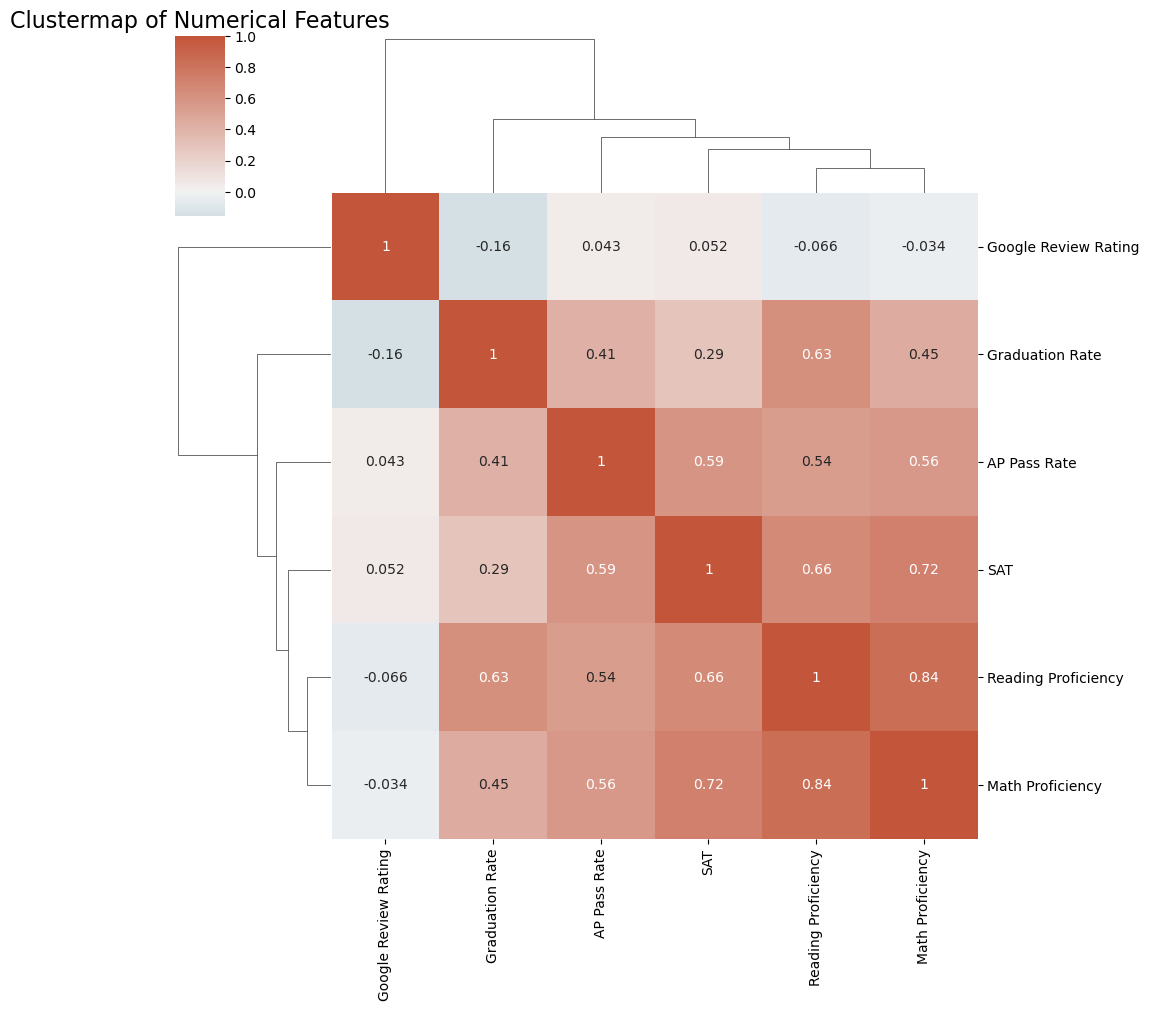

In [ ]:
sns.clustermap(corr_matrix, vmax= 1, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True), center=0)# also did clustermap
plt.title("Clustermap of Numerical Features", fontsize=16)
plt.savefig("./plots/clustermap.png")
plt.show()

Regression results for Google Review Rating vs Graduation Rate:
R-squared: 0.04105658203264184
Mean Squared Error: 0.36771184166342613


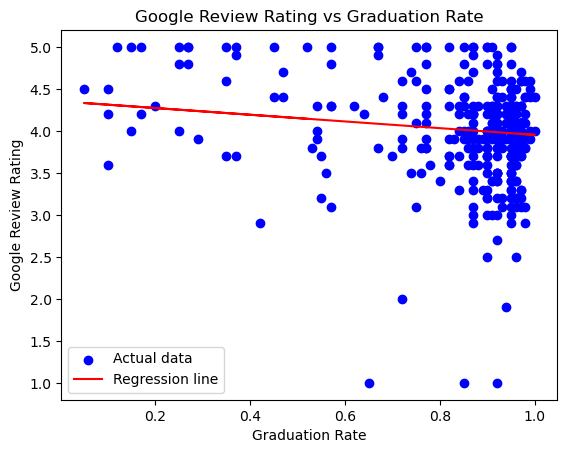

Regression results for Google Review Rating vs Reading Proficiency:
R-squared: 0.008331709881979843
Mean Squared Error: 0.3802603641114207


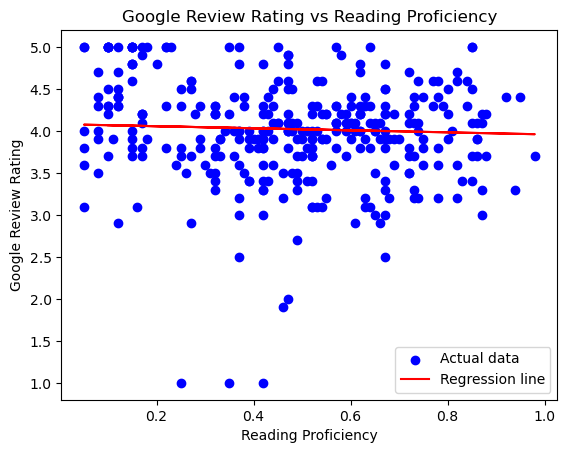

Regression results for Google Review Rating vs Math Proficiency:
R-squared: -4.064118421642782e-05
Mean Squared Error: 0.38347078567740783


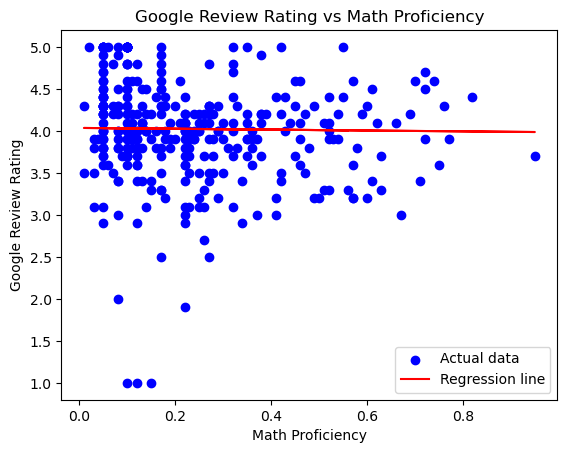

Regression results for Google Review Rating vs SAT:
R-squared: 0.00571227810049546
Mean Squared Error: 0.28621679055264987


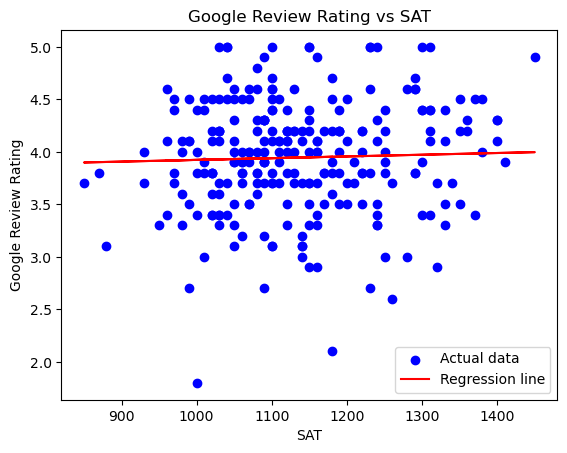

Regression results for Google Review Rating vs AP Pass Rate:
R-squared: -0.00014356750103394766
Mean Squared Error: 0.23247800264140697


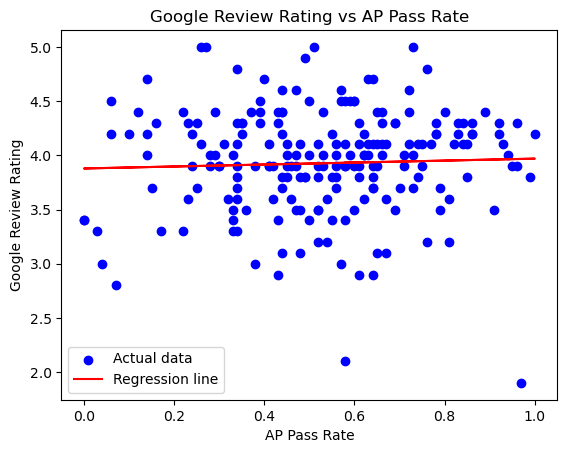

{'Graduation Rate': {'R^2': 0.04105658203264184, 'MSE': 0.36771184166342613},
 'Reading Proficiency': {'R^2': 0.008331709881979843,
  'MSE': 0.3802603641114207},
 'Math Proficiency': {'R^2': -4.064118421642782e-05,
  'MSE': 0.38347078567740783},
 'SAT': {'R^2': 0.00571227810049546, 'MSE': 0.28621679055264987},
 'AP Pass Rate': {'R^2': -0.00014356750103394766, 'MSE': 0.23247800264140697}}

In [ ]:
regression_stats = {}
for pair in pairs:
    r2, mse = linear_regression(pair[0], pair[1])
    regression_stats[pair[0]] = {"R^2": r2, "MSE": mse}
regression_stats


In [ ]:
df['County Encoded'] = df['County'].astype('category').cat.codes # numeric encoding for counties so we can have a gradient
fig = px.scatter(
    df,
    x='Graduation Rate',
    y='Google Review Rating',
    color='County Encoded',  # Gradient color based on encoded county
    hover_data=['Name', 'City', 'District', 'County'],
    title="Graduation Rate vs. Maps Rating (Color Gradient by County)",
    labels={
        'Google Review Rating': 'Google Review Rating',
        'Graduation Rate': 'Graduation Rate',
        'County_Encoded': 'County (Gradient)'
    },
    color_continuous_scale=[(0, "white"), (1, "darkred")]
)

# Save as an HTML file
fig.write_html("./plots/graduation_vs_maps_by_county_gradient.html")

# Optional: Show the plot in a web browser
fig.show()